In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv("data/heart_disease_selected_features.csv")
df.head()

,thal_reversable defect,oldpeak,thal_normal,cp_asymptomatic,chol,slope_upsloping,trestbps,cp_non-anginal pain,exang_no,sex_female,thalach,age,ca,num
0,False,2.3,False,False,233,False,145,False,True,False,150,63,0.0,0
1,False,1.5,True,True,286,False,160,False,False,False,108,67,3.0,1
2,True,2.6,False,True,229,False,120,False,False,False,129,67,2.0,1
3,False,3.5,True,False,250,False,130,True,True,False,187,37,0.0,0
4,False,1.4,True,False,204,True,130,False,True,True,172,41,0.0,0


In [ ]:
X = df.drop("num", axis=1)
y = df["num"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

c:\Users\eslam\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\eslam\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\eslam\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\eslam\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

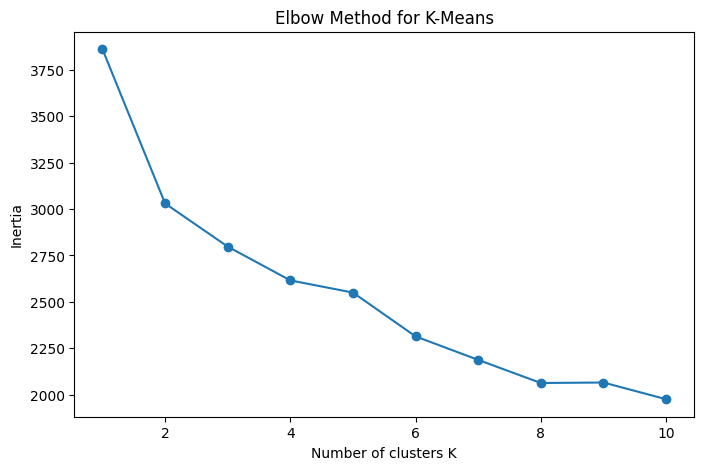

In [12]:
# Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

c:\Users\eslam\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


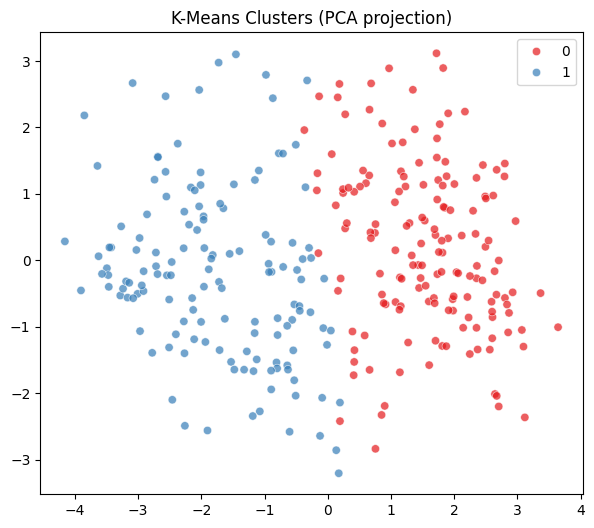

Heart Disease,0,1
Cluster,,
0,136,21
1,24,116


In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_kmeans, palette="Set1", alpha=0.7)
plt.title("K-Means Clusters (PCA projection)")
plt.show()

pd.crosstab(clusters_kmeans, y, rownames=['Cluster'], colnames=['Heart Disease'])

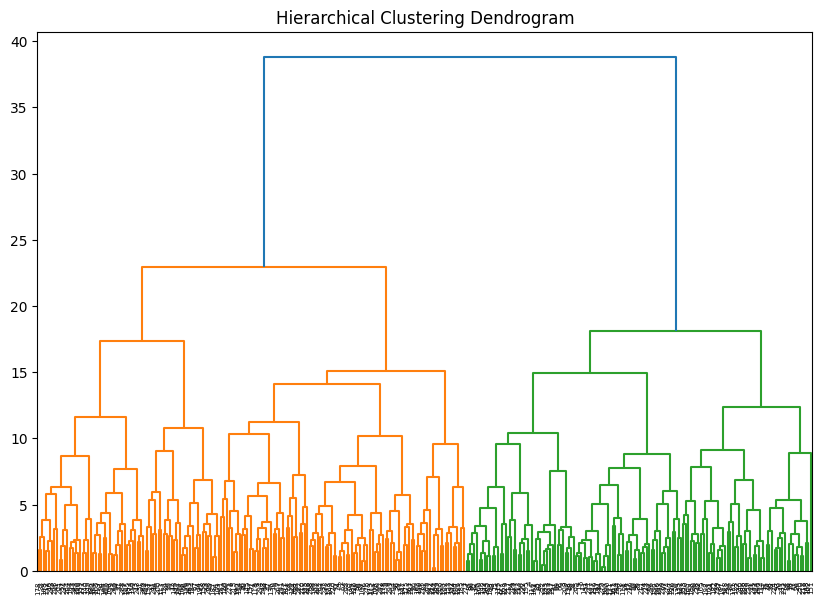

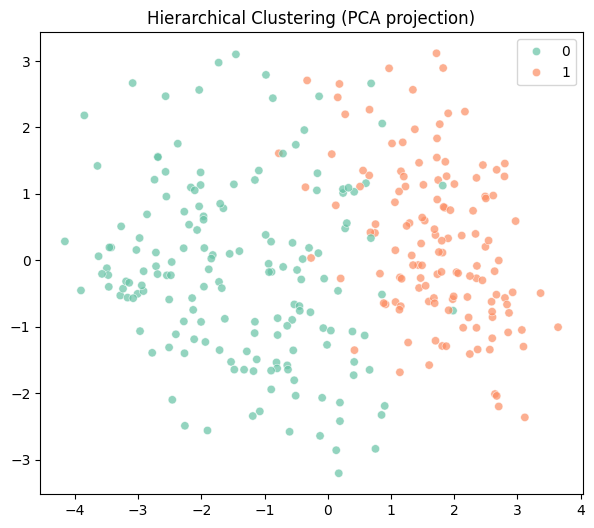

Heart Disease,0,1
Cluster,,
0,47,117
1,113,20


In [14]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Agglomerative Clustering with 2 clusters
agglo = AgglomerativeClustering(n_clusters=2)
clusters_agglo = agglo.fit_predict(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_agglo, palette="Set2", alpha=0.7)
plt.title("Hierarchical Clustering (PCA projection)")
plt.show()

# Compare clusters with actual labels
pd.crosstab(clusters_agglo, y, rownames=['Cluster'], colnames=['Heart Disease'])